<h1 style="text-align:center;">US Gun Deaths (2006-2020) </h1>
 

<center>

###### Ben Ward

</center>


![Alt Text](https://holsterbuilder.com/images/blog/35/banner-2019-10-06T193809.404.jpg)




##### The dataset covers gun violence in the United States from 2006 to 2020. It includes details such as age, location, intent, education, and police involvement for each incident. This comprehensive dataset provides insights into the dynamics of gun-related incidents over a 15-year period, allowing for analyses of trends and patterns related to age, geographical location, motives, educational background, and interactions with law enforcement.

##### I chose a U.S. gun deaths dataset for my project because it provided an opportunity to explore important aspects of gun-related incidents in this country. This dataset helped me understand factors such as who was affected, where these incidents occurred, and the reasons behind them—whether they were intentional, accidental, or due to other factors. In essence, it was a meaningful choice for my project, enabling me to use data to gain insights and issues related to gun violence in the United States.

### Import the required libraries

In [1]:
# Importing necessary libraries
import numpy as np           # NumPy is used for numerical operations and array handling
import pandas as pd          # Pandas is used for data manipulation and analysis
import glob                  # Glob is used for file path expansion using wildcards
import matplotlib.pyplot as plt  # Matplotlib is a plotting library for creating visualizations
import seaborn as sns        # Seaborn is based on Matplotlib and provides a high-level interface for statistical graphics
import plotly.express as px  # Import the 'plotly.express' library for easy and interactive data visualization.
                             
# Ensuring that the plots are displayed inline in Jupyter notebooks
%matplotlib inline


### Data loading and inspection
###### I've combinded a dataset that was initially distributed across  15 separate CSV files into a single file.

In [2]:
# Define a directory where your CSV files are located
directory = r'C:\Users\pitbo\Desktop\project\gun_deaths'

# Use glob to get a list of all CSV files in the directory and its subdirectories
# Parameters:
# - directory: The base directory path where the search for CSV files will start
# - '**/*.csv': The pattern to match files; '**' indicates a recursive search in all subdirectories,
#   and '*.csv' specifies that the files should have a '.csv' extension
csv_files = glob.glob(directory + '**/*.csv', recursive=True)

# Load and concatenate all CSV files into a single DataFrame
df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

# Save the combined DataFrame to a new CSV file
df.to_csv("gun_deaths.csv", index=False)

# Display the first and last 5 rows
df

year  month    intent  police sex   age      race  hispanic  \
0       2006      1   Suicide       0   M  81.0     White       100   
1       2006      1  Homicide       0   M  55.0     White       100   
2       2006      1  Homicide       0   M  19.0     Black       100   
3       2006      1  Homicide       0   M  33.0     Black       100   
4       2006      1  Homicide       0   M  23.0     Black       100   
...      ...    ...       ...     ...  ..   ...       ...       ...   
529228  2020     12   Suicide       0   M  35.0  Hispanic       275   
529229  2020     12  Homicide       0   M  34.0     Black       100   
529230  2020     12  Homicide       0   M  26.0     Black       100   
529231  2020     12  Homicide       0   M  24.0     Black       100   
529232  2020     12  Homicide       1   M  18.0  Hispanic       299   

                     place     education  
0                     Home        HS/GED  
1        Other unspecified  Less than HS  
2                     Home  Less than HS  
3        Other unspecified  Less than HS  
4                     Home  Less than HS  
...                    ...           ...  
529228                Home  Some college  
529229              Street        HS/GED  
529230              Street        HS/GED  
529231  Trade/service area        HS/GED  
529232                 NaN        HS/GED  

[529233 rows x 10 columns]

###### Checking how many rows and columns are in the dataset

In [3]:
# Checking shape
df.shape

#529,233 rows and 10 columns

(529233, 10)

###### Checking the file types

In [4]:
# Checking file types
df.dtypes

year           int64
month          int64
intent        object
police         int64
sex           object
age          float64
race          object
hispanic       int64
place         object
education     object
dtype: object

###### Checking for null values

In [5]:
# Checking for null values
print(df.isnull().sum())

year             0
month            0
intent          27
police           0
sex              0
age             77
race             0
hispanic         0
place         6660
education    13208
dtype: int64


###### Dropping the missing values

In [6]:
# Dropping missing values
df = df.dropna()    
df.count()

year         509539
month        509539
intent       509539
police       509539
sex          509539
age          509539
race         509539
hispanic     509539
place        509539
education    509539
dtype: int64

In [7]:
# After dropping missing values
print(df.isnull().sum()) 

year         0
month        0
intent       0
police       0
sex          0
age          0
race         0
hispanic     0
place        0
education    0
dtype: int64


### Data cleaning

###### Dropping irrelevant columns

In [8]:
# Dropping the "hispanic" column as it is meaningless for this project
# Now contains 9 columns since dropping 1
df = df.drop(['hispanic'], axis=1)
df.head(5)

year  month    intent  police sex   age   race              place  \
0  2006      1   Suicide       0   M  81.0  White               Home   
1  2006      1  Homicide       0   M  55.0  White  Other unspecified   
2  2006      1  Homicide       0   M  19.0  Black               Home   
3  2006      1  Homicide       0   M  33.0  Black  Other unspecified   
4  2006      1  Homicide       0   M  23.0  Black               Home   

      education  
0        HS/GED  
1  Less than HS  
2  Less than HS  
3  Less than HS  
4  Less than HS

###### Renaming a column

In [9]:
# Renaming column "place" to "location"
df = df.rename(columns={"place": "location"})
df.head(5)

year  month    intent  police sex   age   race           location  \
0  2006      1   Suicide       0   M  81.0  White               Home   
1  2006      1  Homicide       0   M  55.0  White  Other unspecified   
2  2006      1  Homicide       0   M  19.0  Black               Home   
3  2006      1  Homicide       0   M  33.0  Black  Other unspecified   
4  2006      1  Homicide       0   M  23.0  Black               Home   

      education  
0        HS/GED  
1  Less than HS  
2  Less than HS  
3  Less than HS  
4  Less than HS

###### Capitalizing the column titles

In [10]:
# Capitalize all the column names
df.columns = df.columns.str.capitalize()
df.head(5)

Year  Month    Intent  Police Sex   Age   Race           Location  \
0  2006      1   Suicide       0   M  81.0  White               Home   
1  2006      1  Homicide       0   M  55.0  White  Other unspecified   
2  2006      1  Homicide       0   M  19.0  Black               Home   
3  2006      1  Homicide       0   M  33.0  Black  Other unspecified   
4  2006      1  Homicide       0   M  23.0  Black               Home   

      Education  
0        HS/GED  
1  Less than HS  
2  Less than HS  
3  Less than HS  
4  Less than HS

###### Checking for duplicate rows
###### I did not remove duplicate rows because duplicate records may represent multiple events occurring on the same date. If you remove duplicates in such cases, you might lose critical information.

In [11]:
# Checking for duplicate rows using .duplicated() function
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (204359, 9)


In [12]:
df.count()

Year         509539
Month        509539
Intent       509539
Police       509539
Sex          509539
Age          509539
Race         509539
Location     509539
Education    509539
dtype: int64

###### Checking for outliers

In [13]:
# Calculating IQR for column Age
Q1 = df['Age'].quantile(0.25) 
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

31.0


In [14]:
# Identify outliers
threshold = 1.5
outliers = df[(df['Age'] < Q1 - threshold * IQR) | (df['Age'] > Q3 + threshold * IQR)]
outliers

Year  Month    Intent  Police Sex    Age      Race Location  \
35732   2007      8  Homicide       0   M  109.0  Hispanic   Street   
223985  2013      9  Homicide       0   M  107.0     Black     Home   
420306  2018      9   Suicide       0   M  105.0     White     Home   
495495  2020      2   Suicide       0   M  106.0     White     Home   

           Education  
35732   Less than HS  
223985  Less than HS  
420306  Less than HS  
495495        HS/GED

In [15]:
# Number of outliers
outliers.count()

Year         4
Month        4
Intent       4
Police       4
Sex          4
Age          4
Race         4
Location     4
Education    4
dtype: int64

###### Dropping the outliers

In [16]:
# Drop rows containing outliers
df_new = df.drop(outliers.index)

In [17]:
# Checking the shape
df_new.shape

(509535, 9)

###### Replacing 0 and 1 with 'No' and 'Yes' in the 'Police' column

In [18]:
# Replacing 0 and 1 with No and Yes
df_new['Police'] = df_new['Police'].replace({0: 'No', 1: 'Yes'})

In [19]:
# Count of Yes
count_of_yes = (df_new['Police'] == 'Yes').sum()
count_of_yes


161

In [20]:
# Count of No
count_of_no = (df_new['Police'] == 'No').sum()
count_of_no

509374

In [21]:
# Police is now object instead of int64
df_new.dtypes

Year           int64
Month          int64
Intent        object
Police        object
Sex           object
Age          float64
Race          object
Location      object
Education     object
dtype: object

In [22]:
# Export cleaned dataset
#df_new.to_csv('new_gundeaths.csv', index=False)

### Data Exploration

In [23]:
#descriptive statistics for numerical data
df_new.describe()


Year          Month            Age
count  509535.000000  509535.000000  509535.000000
mean     2013.547768       6.566550      42.953842
std         4.338726       3.399912      19.516416
min      2006.000000       1.000000       0.000000
25%      2010.000000       4.000000      26.000000
50%      2014.000000       7.000000      40.000000
75%      2017.000000       9.000000      57.000000
max      2020.000000      12.000000     103.000000

###### Descriptive statistics for categorical data

In [24]:
# Descriptive statistics for the column "Intent"
stats_categorical = df_new['Intent'].describe()
print(stats_categorical)

count      509535
unique          4
top       Suicide
freq       307957
Name: Intent, dtype: object


In [25]:
# Descriptive statistics for the column "Police"
stats_categorical = df_new['Police'].describe()
print(stats_categorical)

count     509535
unique         2
top           No
freq      509374
Name: Police, dtype: object


In [26]:
# Descriptive statistics for the column "Sex"
stats_categorical = df_new['Sex'].describe()
print(stats_categorical)

count     509535
unique         2
top            M
freq      437070
Name: Sex, dtype: object


In [27]:
# Descriptive statistics for the column "Race"
stats_categorical = df_new['Race'].describe()
print(stats_categorical)

count     509535
unique         5
top        White
freq      319514
Name: Race, dtype: object


In [28]:
# Descriptive statistics for the column "Location"
stats_categorical = df_new['Location'].describe()
print(stats_categorical)

count     509535
unique        10
top         Home
freq      287192
Name: Location, dtype: object


In [29]:
# Descriptive statistics for the column "Education"
stats_categorical = df_new['Education'].describe()
print(stats_categorical)

count     509535
unique         4
top       HS/GED
freq      223236
Name: Education, dtype: object


In [30]:
# Descriptive statistics for the entire dataframe
df_new.describe(include = 'all')

Year          Month   Intent  Police     Sex            Age  \
count   509535.000000  509535.000000   509535  509535  509535  509535.000000   
unique            NaN            NaN        4       2       2            NaN   
top               NaN            NaN  Suicide      No       M            NaN   
freq              NaN            NaN   307957  509374  437070            NaN   
mean      2013.547768       6.566550      NaN     NaN     NaN      42.953842   
std          4.338726       3.399912      NaN     NaN     NaN      19.516416   
min       2006.000000       1.000000      NaN     NaN     NaN       0.000000   
25%       2010.000000       4.000000      NaN     NaN     NaN      26.000000   
50%       2014.000000       7.000000      NaN     NaN     NaN      40.000000   
75%       2017.000000       9.000000      NaN     NaN     NaN      57.000000   
max       2020.000000      12.000000      NaN     NaN     NaN     103.000000   

          Race Location Education  
count   509535   509535    509535  
unique       5       10         4  
top      White     Home    HS/GED  
freq    319514   287192    223236  
mean       NaN      NaN       NaN  
std        NaN      NaN       NaN  
min        NaN      NaN       NaN  
25%        NaN      NaN       NaN  
50%        NaN      NaN       NaN  
75%        NaN      NaN       NaN  
max        NaN      NaN       NaN

###### Checking categorical data for unique values

In [31]:
# Unique values of the column "Intent"
df_new['Intent'].unique()

array(['Suicide', 'Homicide', 'Accidental', 'Undetermined'], dtype=object)

In [32]:
# Unique values of the column "Race"
df_new['Race'].unique()

array(['White', 'Black', 'Hispanic', 'Asian/Pacific Islander',
       'Native American/Native Alaskan'], dtype=object)

In [33]:
# Unique values of the column "Location"
df_new['Location'].unique()

array(['Home', 'Other unspecified', 'Street', 'Other specified',
       'Trade/service area', 'School/instiution',
       'Residential institution', 'Farm', 'Industrial/construction',
       'Sports'], dtype=object)

In [34]:
# Unique values of the column "Education"
df_new['Education'].unique()

array(['HS/GED', 'Less than HS', 'Some college', 'BA+'], dtype=object)

In [35]:
# Unique value counts for the entire dataframe
df_new.value_counts().head(20)

Year  Month  Intent    Police  Sex  Age   Race   Location           Education   
2016  8      Homicide  No      M    25.0  Black  Other unspecified  HS/GED          21
      3      Homicide  No      M    18.0  Black  Other unspecified  Less than HS    20
      7      Homicide  No      M    24.0  Black  Other unspecified  HS/GED          20
      3      Homicide  No      M    23.0  Black  Other unspecified  HS/GED          20
2015  4      Suicide   No      M    55.0  White  Home               HS/GED          20
2018  7      Suicide   No      M    58.0  White  Home               HS/GED          20
2016  8      Homicide  No      M    24.0  Black  Other unspecified  HS/GED          19
2019  10     Suicide   No      M    59.0  White  Home               HS/GED          19
2016  9      Homicide  No      M    23.0  Black  Other unspecified  HS/GED          19
      7      Homicide  No      M    17.0  Black  Other unspecified  Less than HS    19
2020  7      Suicide   No      M    63.0  White  

###### Checking for number of gun deaths by sex, intent, race, location, and education

In [36]:
# Count of gun deaths by sex
df_new.Sex.value_counts(normalize=False)

M    437070
F     72465
Name: Sex, dtype: int64

In [37]:
# Count of gun deaths by intent
df_new.Intent.value_counts(ascending=False)

Suicide         307957
Homicide        189482
Accidental        7897
Undetermined      4199
Name: Intent, dtype: int64

In [38]:
# Count of gun deaths by race
df_new.Race.value_counts(ascending=False)


White                             319514
Black                             128312
Hispanic                           49952
Asian/Pacific Islander              7001
Native American/Native Alaskan      4756
Name: Race, dtype: int64

In [39]:
# Count of gun deaths by location
df_new['Location'].value_counts()

Home                       287192
Other specified             70583
Other unspecified           66355
Street                      59371
Trade/service area          17253
School/instiution            3147
Farm                         2297
Industrial/construction      1341
Residential institution      1330
Sports                        666
Name: Location, dtype: int64

In [40]:
# Count of gundeaths by Education
df_new['Education'].value_counts()

HS/GED          223236
Less than HS    117578
Some college    105973
BA+              62748
Name: Education, dtype: int64

In [41]:
# Count of suicides by year
df_suicide=df_new[ df_new["Intent"]=="Suicide"]
df_GunSuicide= df_suicide.Year.value_counts(ascending=False)
df_GunSuicide.sort_values(ascending=True)

2006    16049
2007    16384
2008    17177
2009    17723
2010    19047
2011    19710
2012    20360
2013    20892
2014    21039
2015    21587
2016    22680
2017    23566
2019    23625
2020    24000
2018    24118
Name: Year, dtype: int64

###### Count of gun deaths for people under the age of 18

In [42]:
# Number of gun deaths for people under the age of 18
df_new[df_new['Age'] < 18].shape

(22297, 9)

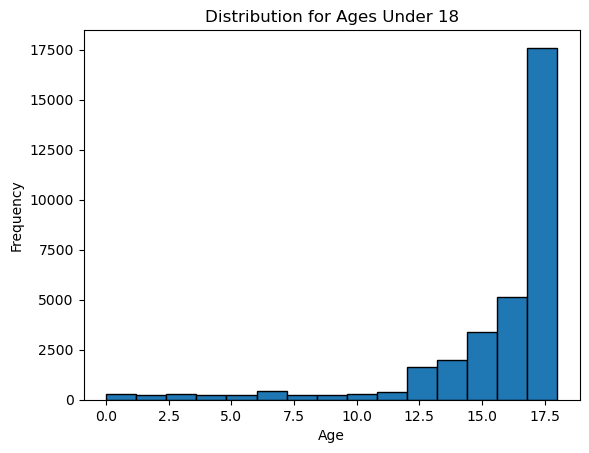

In [43]:
# Plotting a histogram to visualize the distribution gun deaths for ages under 18 

# Selecting data: Filtering the DataFrame to include only rows where the age is under 18
ages_under_18 = df_new[df_new['Age'] <= 18]['Age']

# Plotting the histogram
plt.hist(ages_under_18, bins=15, edgecolor='black')

# Adding labels and title to the plot

# X-axis label
plt.xlabel('Age')

# Y-axis label
plt.ylabel('Frequency')

# Title of the histogram
plt.title('Distribution for Ages Under 18')

# Displaying the plot
plt.show()



###### Count of suicide deaths for people under the age of 18

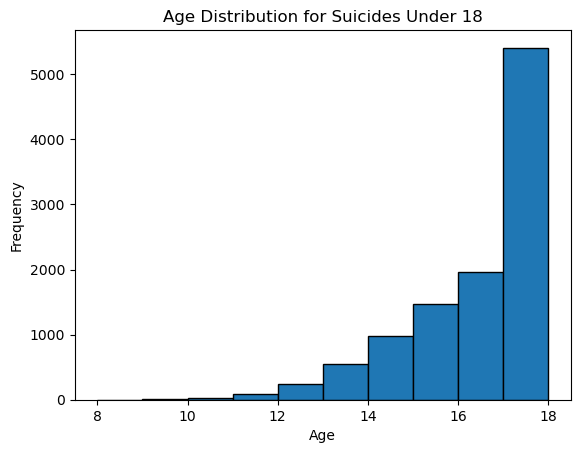

In [44]:
# Filter DataFrame for ages under 18 and with 'Intent' as 'Suicide'
suicide_under_18 = df_new[(df_new['Age'] <= 18) & (df_new['Intent'] == 'Suicide')]

# Plotting the histogram
plt.hist(suicide_under_18['Age'], bins=10, edgecolor='black')

# Adding labels and title to the plot

# X-axis label
plt.xlabel('Age')

# Y-axis label
plt.ylabel('Frequency')

# Title of the histogram
plt.title('Age Distribution for Suicides Under 18')

# Displaying the plot
plt.show()



### Visualizations

###### Distribution of education levels

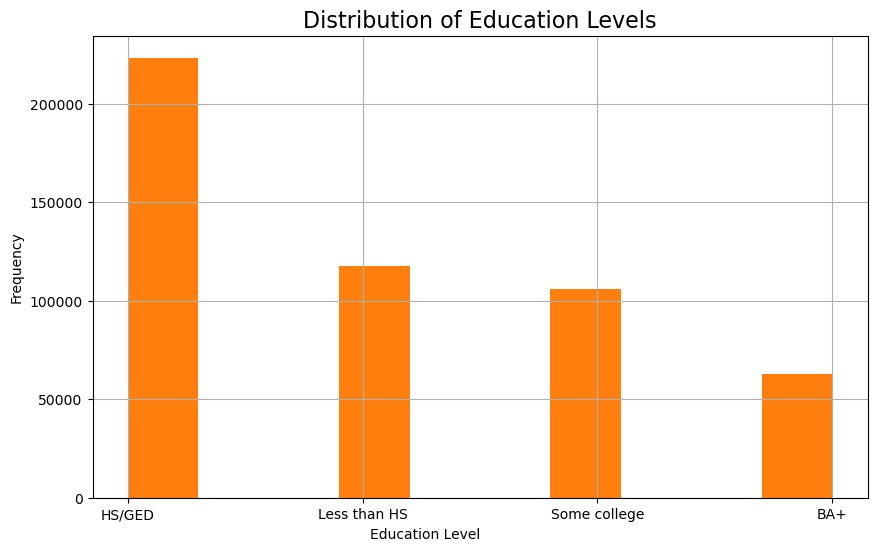

In [45]:
# Plotting a histogram to visualize the distribution of education levels

# Increase figure size
plt.figure(figsize=(10, 6))

# Selecting data: Extracting the 'Education' column for plotting
education_data = df_new['Education']

# Plotting the histogram without gridlines
education_data.hist(grid=False)

# Plotting the histogram
education_data.hist()

# Adding labels and title to the plot

# X-axis label 
plt.xlabel('Education Level',ha='right')

# Y-axis label
plt.ylabel('Frequency')

# Title of the histogram
plt.title('Distribution of Education Levels', fontsize=16)

# Displaying the plot
plt.show()



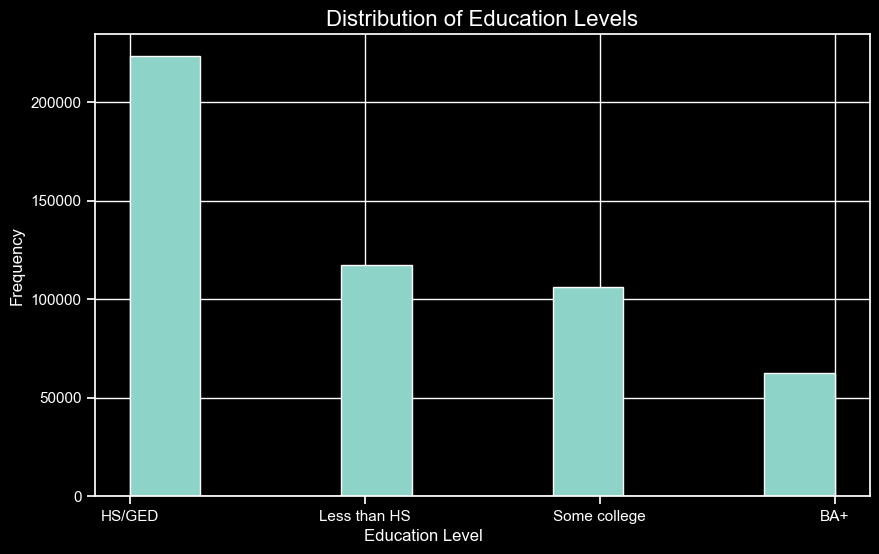

In [88]:
# Plotting a histogram to visualize the distribution of education levels

# Increase figure size
plt.figure(figsize=(10, 6))

# Selecting data: Extracting the 'Education' column for plotting
education_data = df_new['Education']

# Plotting the histogram without gridlines
education_data.hist()

# Adding labels and title to the plot

# X-axis label 
plt.xlabel('Education Level', ha='right')

# Y-axis label
plt.ylabel('Frequency')

# Title of the histogram
plt.title('Distribution of Education Levels', fontsize=16)

# Displaying the plot
plt.show()


###### Visualizing the age distribution

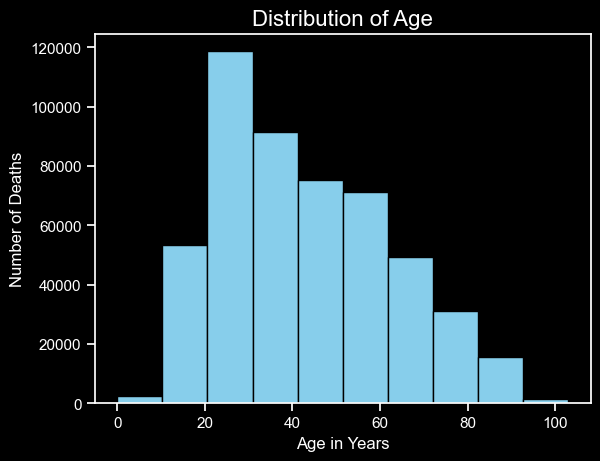

In [89]:
# Creating a histogram for the 'Age' column 
plt.hist(df_new['Age'], bins=10, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed

# Adding title to the plot
plt.title('Distribution of Age', fontsize=16)

# Labeling the x-axis
plt.xlabel('Age in Years')

# Labeling the y-axis
plt.ylabel('Number of Deaths')

# Displaying the plot
plt.show()


###### Age distribution by homicide

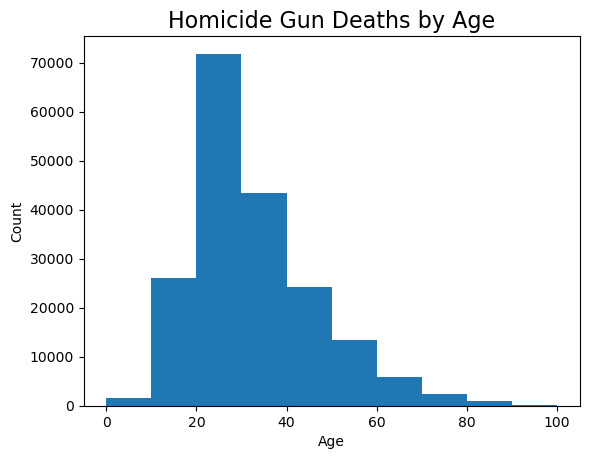

In [47]:
# Creating a histogram for ages at gun death with intent labeled as "Homicide"
plt.hist(df_new.Age[df_new.Intent == "Homicide"])

# Adding x-axis label
plt.xlabel("Age")

# Adding y-axis label
plt.ylabel("Count")

# Adding title to the plot
plt.title("Homicide Gun Deaths by Age", fontsize=16)

# Displaying the plot
plt.show()


###### Visualizing the age distribution with bins

<Axes: ylabel='Frequency'>

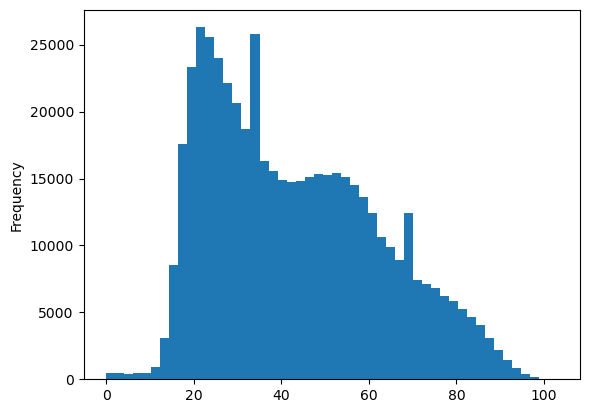

In [48]:
# Plotting a histogram to visualize the distribution of ages
# Plotting the histogram with specified bins
df_new['Age'].plot.hist(bins=50)

###### Visualizing the intent

C:\Users\pitbo\AppData\Local\Temp\ipykernel_5280\2341679669.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(location_summary.index, rotation=45, ha='right')


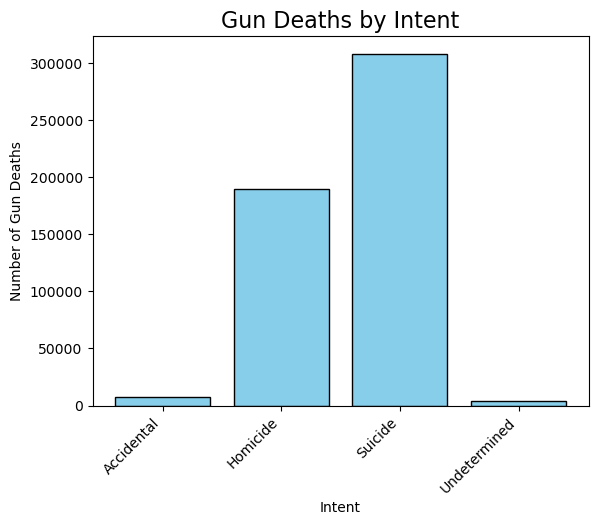

In [49]:
# Calculating the summary data for gun deaths by intent
location_summary = df_new['Intent'].value_counts().sort_index()

# Creating a bar plot
fig, ax = plt.subplots()
ax.bar(location_summary.index, location_summary, color='skyblue', edgecolor='black')

# Adding x-axis label
ax.set_xlabel('Intent')

# Adding y-axis label
ax.set_ylabel('Number of Gun Deaths')

# Adding title to the plot
ax.set_title('Gun Deaths by Intent', fontsize=16)

# Rotating x-axis labels diagonally for better spacing
ax.set_xticklabels(location_summary.index, rotation=45, ha='right')

# Displaying the plot
plt.show()


###### Visualizing the gender

<Axes: >

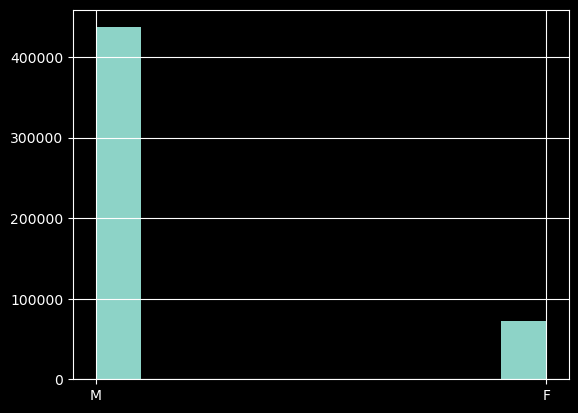

In [50]:
# Plotting a histogram to visualize the distribution of sex

plt.style.use('dark_background')
df_new['Sex'].hist()





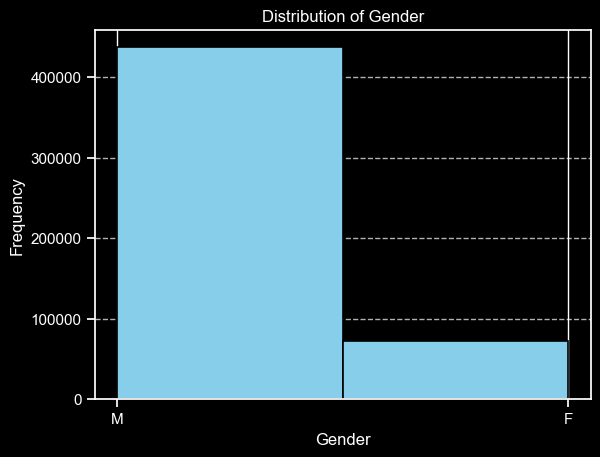

In [83]:


# Set the style to dark background
plt.style.use('dark_background')

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the histogram with customized bar width and colors
df_new['Sex'].hist(ax=ax, bins=2, color='skyblue', edgecolor='black', linewidth=1.2)

# Customize labels and title
ax.set_title('Distribution of Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Frequency')

# Customize grid and ticks
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xticks(df_new['Sex'].unique())  # Set ticks to unique values in 'Sex'

# Customize legend if needed
# ax.legend()

# Show the plot
plt.show()



###### Visualizing police shooting deaths

<Axes: >

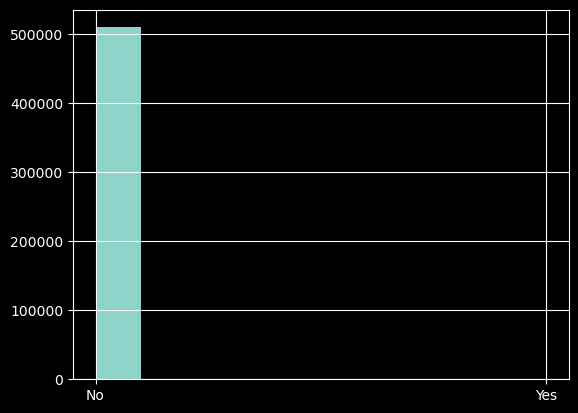

In [51]:
# Plotting a histogram to visualize the distribution of police shootings
# Noted there are only 161 'Yes' police shootings in this dataset
df_new['Police'].hist()

###### Gun deaths sorted by race

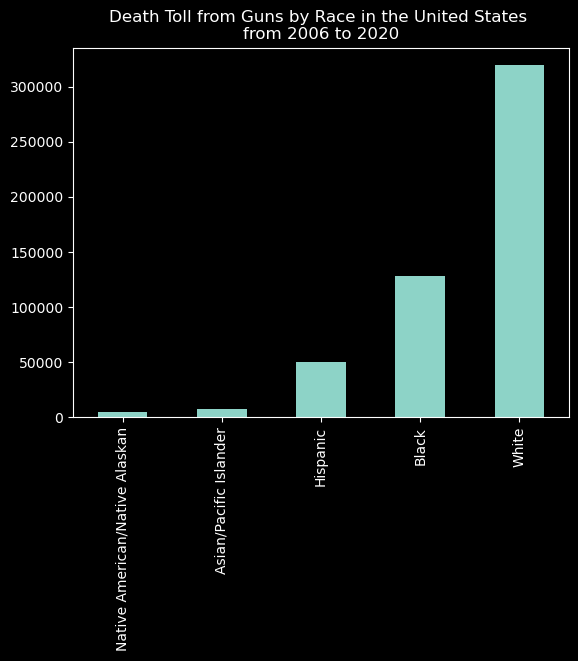

In [52]:
# Counting the number of gun deaths by race in ascending order
race_counts = df_new['Race'].value_counts(ascending=True)

# Creating a bar plot for the death toll by race
race_counts.plot.bar()

# Adding title to the plot
plt.title('Death Toll from Guns by Race in the United States \nfrom 2006 to 2020')

# Displaying the plot
plt.show()


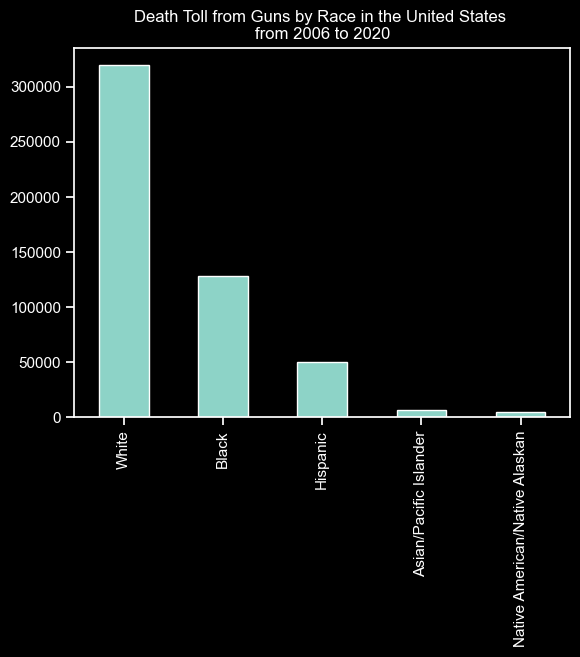

In [84]:


# Assuming df_new is your DataFrame

# Counting the number of gun deaths by race in descending order
race_counts = df_new['Race'].value_counts(ascending=False)

# Creating a bar plot for the death toll by race
race_counts.plot.bar()

# Adding title to the plot
plt.title('Death Toll from Guns by Race in the United States \nfrom 2006 to 2020')

# Displaying the plot
plt.show()


###### Gun deaths by gender sorted by race

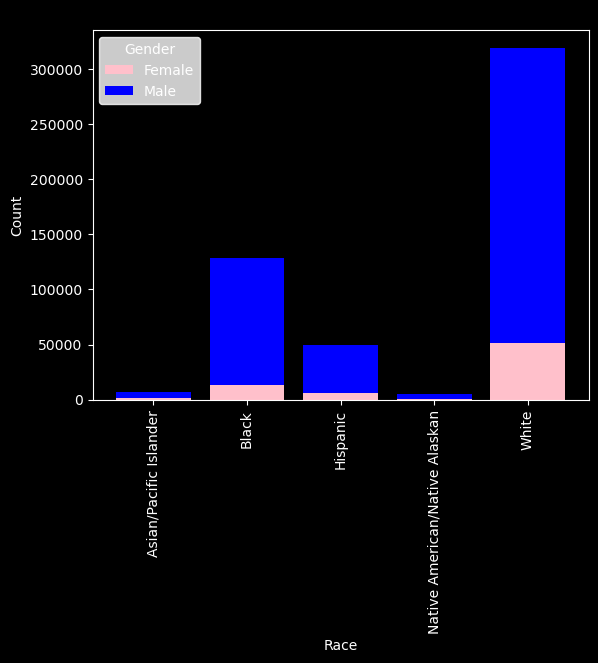

In [53]:
# Filter data for female and male gun deaths, grouped by race
df_female = df_new[df_new['Sex'] == 'F'].groupby('Race').size()
df_male = df_new[df_new['Sex'] == 'M'].groupby('Race').size()

# Create a DataFrame for plotting
df_plot = pd.DataFrame({'Female': df_female, 'Male': df_male})

# Plotting with custom colors and background
fig, ax = plt.subplots()
ax.set_facecolor('black')  # Set the background color to black

# Create a stacked bar plot for female and male gun deaths by race
df_plot.plot(kind='bar', stacked=True, color=['pink', 'blue'], width=0.8, ax=ax)

# Customize the plot
ax.set_title('Gender Distribution by Race', color='black')  # Set title color to black
ax.set_xlabel('Race', color='white')  # Set x-axis label color to white
ax.set_ylabel('Count', color='white')  # Set y-axis label color to white


# Add legend to the top left corner with white background
legend = ax.legend(['Female', 'Male'], loc='upper left', title='Gender', facecolor='white')
legend.get_frame().set_edgecolor('white')  # Set legend edge color to white

# Display the plot
plt.show()


###### Gender distribution sorted by intent

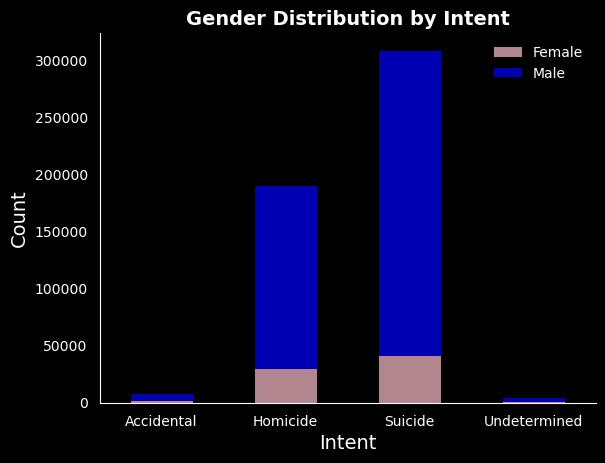

In [54]:
# Grouping the DataFrame by 'Intent' and 'Sex', counting the occurrences, and unstacking the 'Sex' column
intent_sex = df_new.groupby(['Intent', 'Sex'])['Intent'].count().unstack('Sex')

# Plotting the gender distribution of gun deaths
ax = intent_sex.plot(kind='bar', stacked=True, alpha=0.7, color=['pink', 'blue'])

# Customizing the plot
ax.set_xlabel('Intent', fontsize=14)  # Set x-axis label
ax.set_ylabel('Count', fontsize=14)  # Set y-axis label
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tick_params(axis='both', which='both', length=5, width=2, color='black')  # Add tick marks with length 5 and width 2, set tick color to black
ax.legend(labels=['Female', 'Male'], frameon=False, loc=0)  # Add legend with custom labels
plt.title('Gender Distribution by Intent', fontsize=14, fontweight='bold')  # Set the title
sns.despine()  # Remove the spines for a cleaner appearance
ax.grid(False)  # Turn off the grid lines

# Show the plot
plt.show()


###### Accidental deaths by age

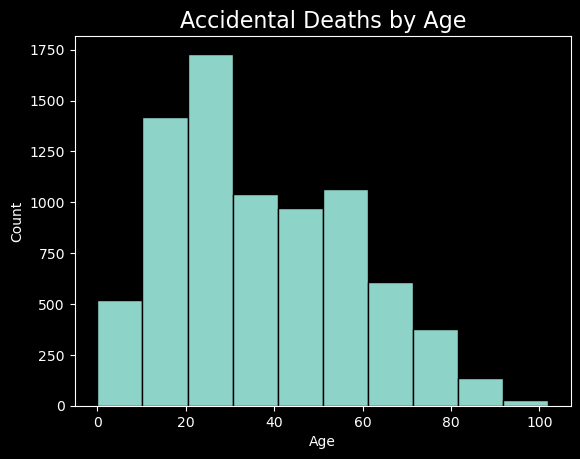

In [55]:
# Plotting a histogram for ages with the intent of "Accidental"
plt.hist(df_new.Age[df_new.Intent == "Accidental"], edgecolor='black')  # Add edgecolor to create borders
plt.xlabel("Age")  # Set x-axis label
plt.ylabel("Count")  # Set y-axis label
plt.title("Accidental Deaths by Age", fontsize=16)  # Set the title of the histogram
plt.show()  # Display the plot



###### Gun deaths by location

C:\Users\pitbo\AppData\Local\Temp\ipykernel_5280\3207473160.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(location_summary.index, rotation=45, ha='right')


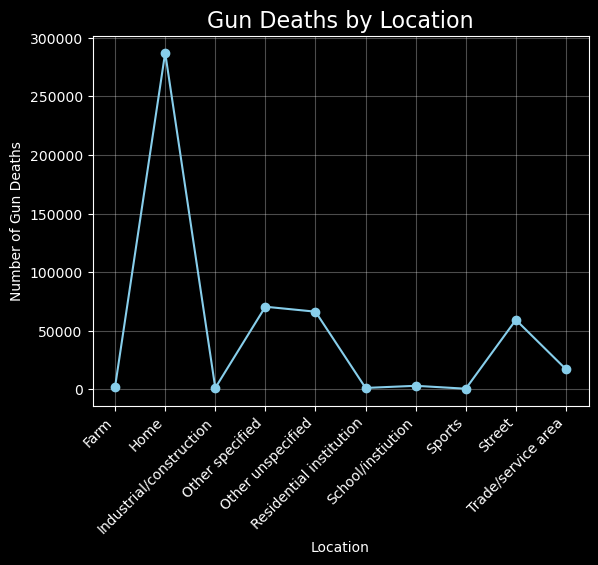

In [56]:
# Count the occurrences of each location in the 'Location' column and sort them by index
location_summary = df_new['Location'].value_counts().sort_index()

# Creating a line plot
fig, ax = plt.subplots()

# Plotting the data with markers, a blue line, and solid linestyle
ax.plot(location_summary.index, location_summary, marker='o', color='skyblue', linestyle='-')

# Customizing the plot
ax.set_xlabel('Location')  # Set x-axis label
ax.set_ylabel('Number of Gun Deaths')  # Set y-axis label
ax.set_title('Gun Deaths by Location', fontsize=16)  # Set the title

# Rotate x-axis labels diagonally for better readability
ax.set_xticklabels(location_summary.index, rotation=45, ha='right')

# Add grid lines with transparency
ax.grid(alpha=0.3)

# Display the plot
plt.show()


###### Suicide deaths by gender

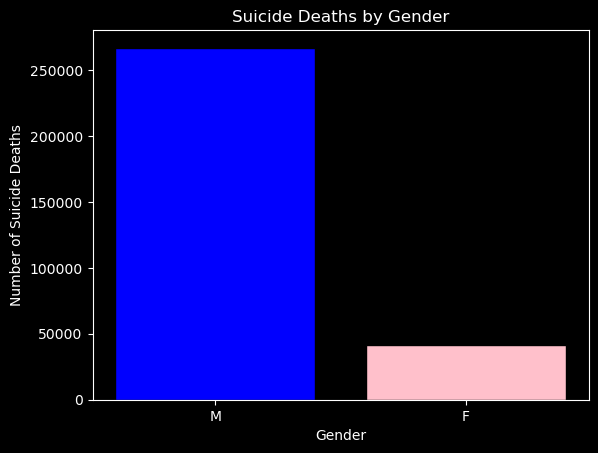

In [57]:
# Filter rows with 'Suicide' as the cause of death
suicide_data = df_new[df_new['Intent'] == 'Suicide']

# Calculate summary data for suicide deaths by gender
suicide_summary = suicide_data['Sex'].value_counts()

# Creating a bar plot
fig, ax = plt.subplots()

# Plotting the data with a bar chart using blue for male and pink for female
ax.bar(suicide_summary.index, suicide_summary, color=['blue', 'pink'], edgecolor='black')

# Customizing the plot
ax.set_xlabel('Gender')  # Set x-axis label to 'Gender'
ax.set_ylabel('Number of Suicide Deaths')  # Set y-axis label to 'Number of Suicide Deaths'
ax.set_title('Suicide Deaths by Gender')  # Set the title of the plot

# Display the plot
plt.show()


###### Suicide deaths by race

C:\Users\pitbo\AppData\Local\Temp\ipykernel_5280\211208550.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(suicide_summary.index, rotation=45, ha='right')


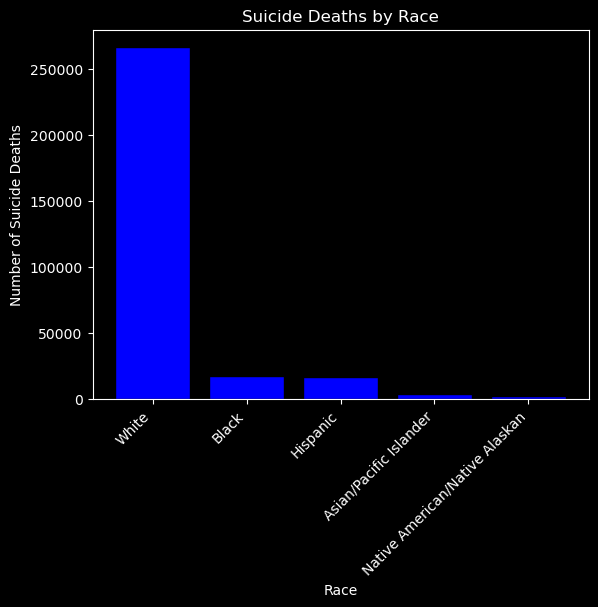

In [58]:
# Filter rows with 'Suicide' as the cause of death
suicide_data = df_new[df_new['Intent'] == 'Suicide']

# Calculate summary data for suicide deaths by gender
suicide_summary = suicide_data['Race'].value_counts()

# Creating a bar plot
fig, ax = plt.subplots()

# Plotting the data with a bar chart using blue for male and pink for female
ax.bar(suicide_summary.index, suicide_summary, color=['blue'], edgecolor='black')

# Customizing the plot
ax.set_xlabel('Race')  # Set x-axis label to 'Gender'
ax.set_ylabel('Number of Suicide Deaths')  # Set y-axis label to 'Number of Suicide Deaths'
ax.set_title('Suicide Deaths by Race')  # Set the title of the plot

# Rotate x-axis labels diagonally for better readability
ax.set_xticklabels(suicide_summary.index, rotation=45, ha='right')

# Display the plot
plt.show()

###### Accidental gun deaths by race

C:\Users\pitbo\AppData\Local\Temp\ipykernel_5280\3966405932.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(accidental_summary.index, rotation=45, ha='right')


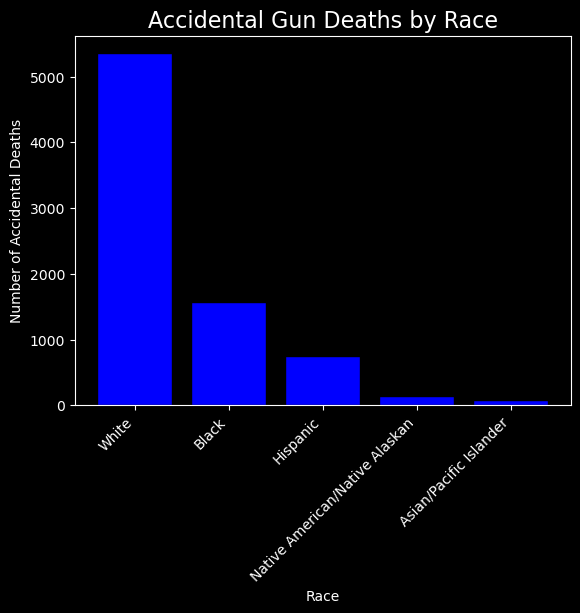

In [59]:
# Filter rows with 'Suicide' as the cause of death
accidental_data = df_new[df_new['Intent'] == 'Accidental']

# Calculate summary data for suicide deaths by gender
accidental_summary = accidental_data['Race'].value_counts()

# Creating a bar plot
fig, ax = plt.subplots()

# Plotting the data with a bar chart using blue for male and pink for female
ax.bar(accidental_summary.index, accidental_summary, color=['blue'], edgecolor='black')

# Customizing the plot
ax.set_xlabel('Race')  # Set x-axis label to 'Gender'
ax.set_ylabel('Number of Accidental Deaths')  # Set y-axis label to 'Number of Suicide Deaths'
ax.set_title('Accidental Gun Deaths by Race', fontsize=16)  # Set the title of the plot

# Rotate x-axis labels diagonally for better readability
ax.set_xticklabels(accidental_summary.index, rotation=45, ha='right')

# Display the plot
plt.show()


###### Suicide deaths by age, grouped into bins

C:\Users\pitbo\AppData\Local\Temp\ipykernel_5280\1477880957.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suicide_data['AgeGroup'] = pd.cut(suicide_data['Age'], bins=bins, labels=labels, right=False)
C:\Users\pitbo\AppData\Local\Temp\ipykernel_5280\1477880957.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(suicide_summary.index, rotation=45, ha='right')


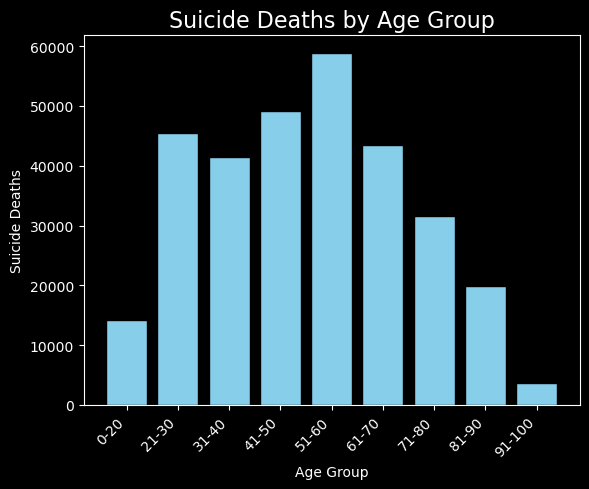

In [60]:
# Filter rows with 'Suicide' as the cause of death
suicide_data = df_new[df_new['Intent'] == 'Suicide']

# Creating bins for age groups
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Adding a new column 'AgeGroup' to the DataFrame based on age bins
suicide_data['AgeGroup'] = pd.cut(suicide_data['Age'], bins=bins, labels=labels, right=False)

# Calculate summary data for suicide deaths by age group
suicide_summary = suicide_data['AgeGroup'].value_counts().sort_index()

# Creating a bar plot
fig, ax = plt.subplots()

# Plotting the data with a bar chart using skyblue color and black edges
ax.bar(suicide_summary.index, suicide_summary, color='skyblue', edgecolor='black')

# Customizing the plot
ax.set_xlabel('Age Group')  # Set x-axis label to 'Age Group'
ax.set_ylabel('Suicide Deaths')  # Set y-axis label to 'Number of Suicide Deaths'
ax.set_title('Suicide Deaths by Age Group', fontsize=16)  # Set the title of the plot

# Rotate x-axis labels diagonally for better spacing
ax.set_xticklabels(suicide_summary.index, rotation=45, ha='right')

# Display the plot
plt.show()


###### Homicide deaths by age group

C:\Users\pitbo\AppData\Local\Temp\ipykernel_5280\2187726479.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homicide_data['AgeGroup'] = pd.cut(homicide_data['Age'], bins=bins, labels=labels, right=False)
C:\Users\pitbo\AppData\Local\Temp\ipykernel_5280\2187726479.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(homicide_summary.index, rotation=45, ha='right')


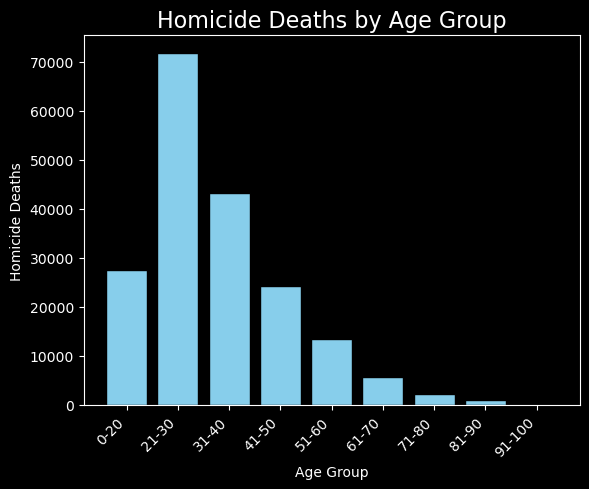

In [61]:
# Filter rows with 'Homicide' as the cause of death 
homicide_data = df_new[df_new['Intent'] == 'Homicide']

# Creating bins for age groups
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Assigning each row to an age group based on the defined bins and labels
homicide_data['AgeGroup'] = pd.cut(homicide_data['Age'], bins=bins, labels=labels, right=False)

# Summary data for homicide deaths by age group
homicide_summary = homicide_data['AgeGroup'].value_counts().sort_index()

# Creating a bar plot
fig, ax = plt.subplots()

# Plotting the bar chart with specified color and edgecolor
ax.bar(homicide_summary.index, homicide_summary, color='skyblue', edgecolor='black')

# Adding labels and title to the plot
ax.set_xlabel('Age Group')
ax.set_ylabel('Homicide Deaths')
ax.set_title('Homicide Deaths by Age Group', fontsize=16)

# Rotating x-axis labels for better spacing and readability
ax.set_xticklabels(homicide_summary.index, rotation=45, ha='right')

# Display the plot
plt.show()


###### Suicide deaths by education level

C:\Users\pitbo\AppData\Local\Temp\ipykernel_5280\1185043080.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(education_summary.index, rotation=45, ha='right')


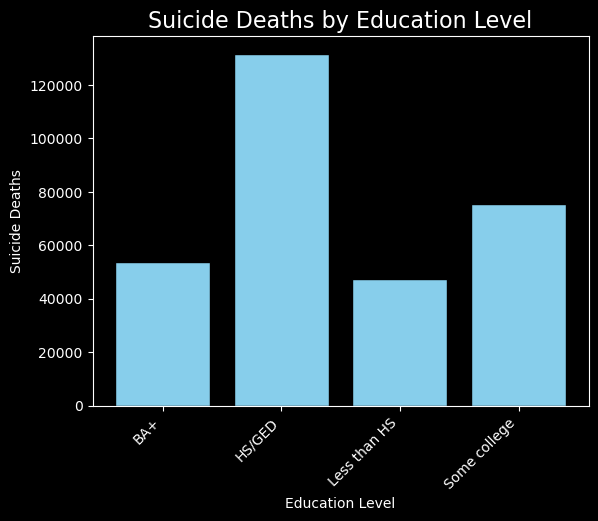

In [62]:
# Filter rows with 'Suicide' as the intent 
suicide_data = df_new[df_new['Intent'] == 'Suicide']

# Summary data for suicide deaths by education level
education_summary = suicide_data['Education'].value_counts().sort_index()

# Creating a bar plot
fig, ax = plt.subplots()

# Plotting the bar chart with specified color and edgecolor
ax.bar(education_summary.index, education_summary, color='skyblue', edgecolor='black')

# Adding labels and title to the plot
ax.set_xlabel('Education Level')
ax.set_ylabel('Suicide Deaths')
ax.set_title('Suicide Deaths by Education Level', fontsize=16)

# Rotating x-axis labels for better spacing and readability
ax.set_xticklabels(education_summary.index, rotation=45, ha='right')

# Display the plot
plt.show()


###### Creating a visualization of the distribution of values for 4 columns of the DataFrame.

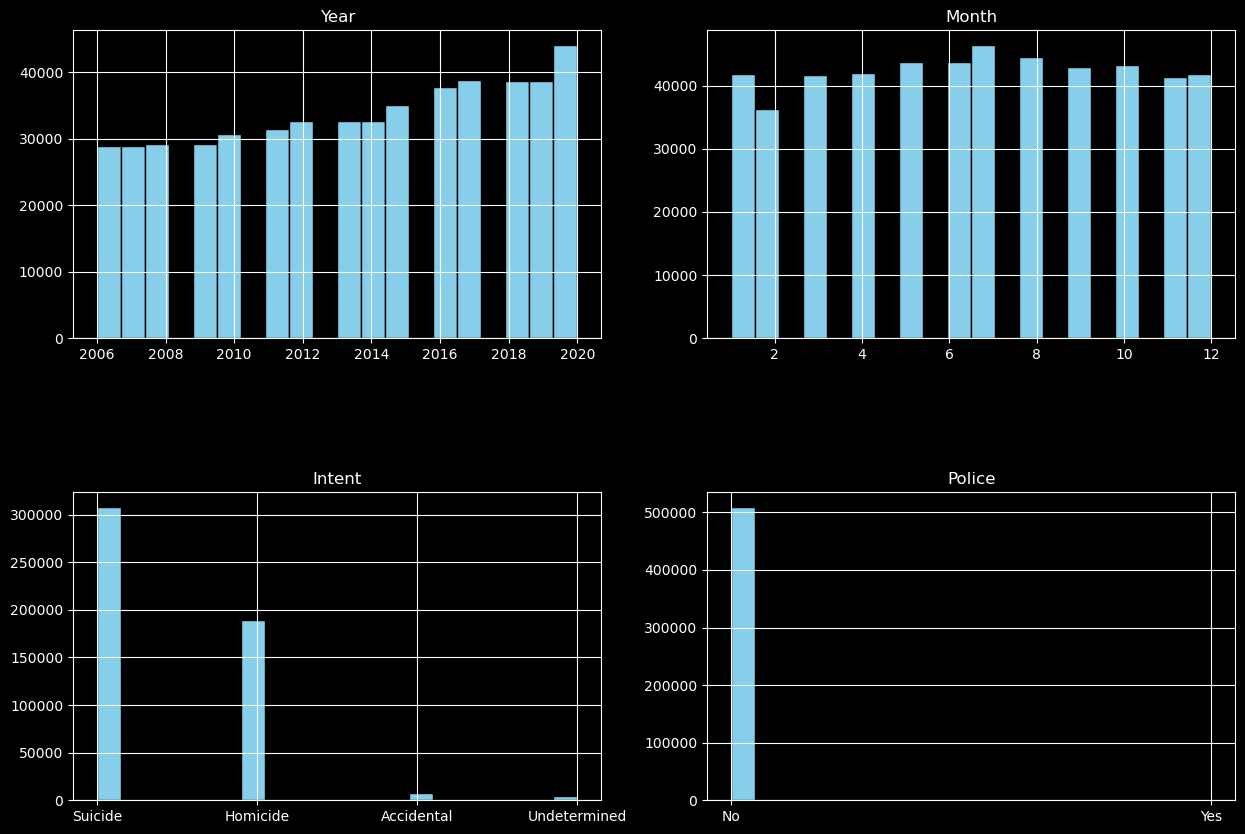

In [63]:
def plot_per_column_distribution(dataframe, rows, columns):
    # Get the number of columns in the DataFrame
    num_columns = dataframe.shape[1]

    # Create a subplot grid with the specified number of rows and columns
    fig, axes = plt.subplots(rows, columns, figsize=(15, 10))
    
    # Adjust the vertical space between subplots
    fig.subplots_adjust(hspace=0.5)

    # Loop through each subplot
    for i, ax in enumerate(axes.flat):
        # Check if the current subplot index is within the number of columns
        if i < num_columns:
            # Get the name of the current column
            column_name = dataframe.columns[i]
            
            # Plot a histogram for the current column with 20 bins, skyblue color, and black edges
            ax.hist(dataframe[column_name], bins=20, color='skyblue', edgecolor='black')
            
            # Set the title of the subplot to the column name
            ax.set_title(column_name)
            
            # Add grid lines to the subplot for better visualization
            ax.grid(True)

    # Display the plot
    plt.show()

# Example usage
plot_per_column_distribution(df_new, 2, 2)


###### Suicide deaths over time

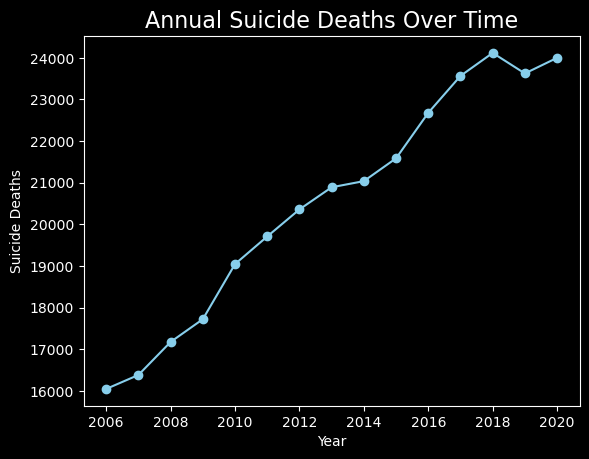

In [64]:
# Filter data for suicide intent
df_suicide = df_new[df_new["Intent"] == "Suicide"]

# Count the occurrences of suicide by year
suicide_counts_by_year = df_suicide['Year'].value_counts(ascending=False)
suicide_counts_by_year = suicide_counts_by_year.sort_index()

# Create a line graph
fig, ax = plt.subplots()

# Plotting the line graph with markers
ax.plot(suicide_counts_by_year.index, suicide_counts_by_year, color='skyblue', marker='o', linestyle='-')

# Set x-axis label
ax.set_xlabel('Year')

# Set y-axis label
ax.set_ylabel('Suicide Deaths')

# Set the title of the line graph
ax.set_title('Annual Suicide Deaths Over Time', fontsize=16)

# Display the line graph
plt.show()


###### Intent by gender

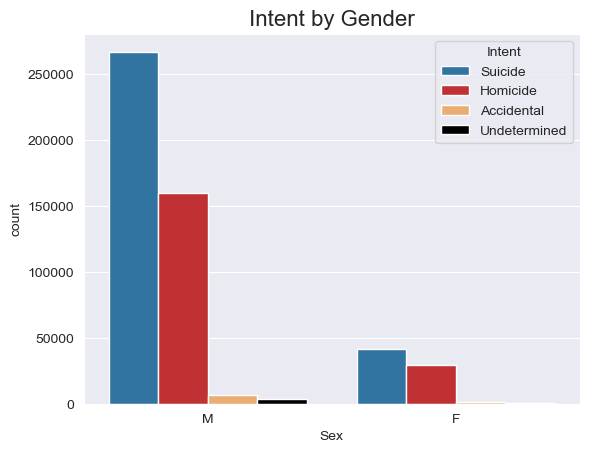

In [65]:
# Set the style to darkgrid
sns.set_style("darkgrid")

# Define custom colors for each category
custom_palette = {"Suicide": "#1f78b4", "Homicide": "#d7191c", "Accidental": "#fdae61", "Undetermined": "black"}

# Create a count plot with custom colors
sns.countplot(x="Sex", hue="Intent", data=df_new, palette=custom_palette)

# Set the title
plt.title("Intent by Gender", fontsize=16)

# Display the plot
plt.show()



###### Gun deaths by month

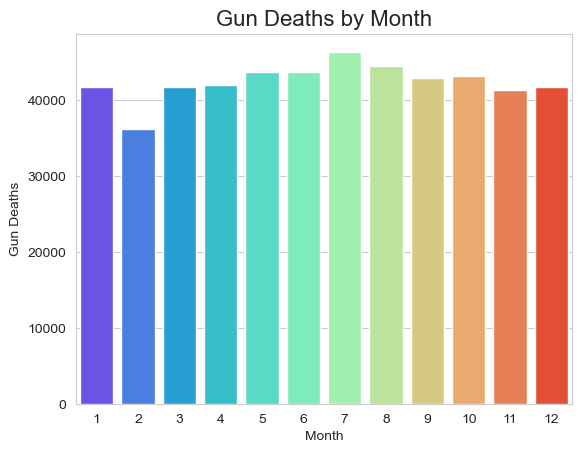

In [66]:
# Set the style to whitegrid
sns.set_style("whitegrid")

# Create a count plot for gun deaths by month
sns.countplot(x="Month", data=df_new, palette="rainbow")

# Customize the plot
plt.xlabel("Month")  # Set x-axis label to 'Month'
plt.ylabel("Gun Deaths")  # Set y-axis label to 'Number of Gun Deaths'
plt.title("Gun Deaths by Month", fontsize=16)  # Set the title of the plot to 'Gun Deaths by Month'

# Display the plot
plt.show()


###### Suicide deaths by month

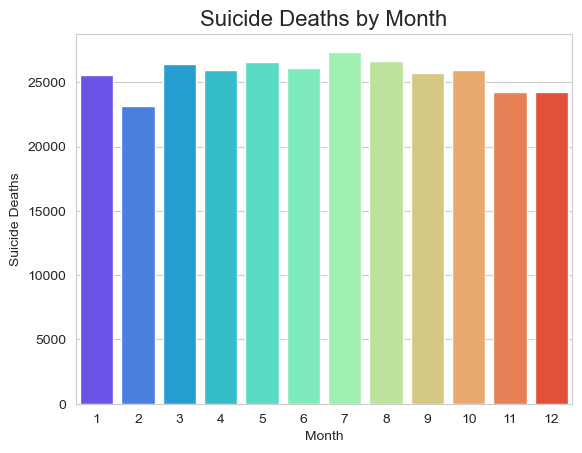

In [67]:
# Set the style to whitegrid
sns.set_style("whitegrid")

# Filter data for suicide deaths
suicide_data = df_new[df_new['Intent'] == 'Suicide']

# Create a count plot for suicide deaths by month
sns.countplot(x="Month", data=suicide_data, palette="rainbow")

# Customize the plot
plt.xlabel("Month")  # Set x-axis label to 'Month'
plt.ylabel("Suicide Deaths")  # Set y-axis label to 'Number of Suicide Deaths'
plt.title("Suicide Deaths by Month", fontsize=16)  # Set the title of the plot to 'Suicide Deaths by Month'

# Display the plot
plt.show()


###### Intent by month

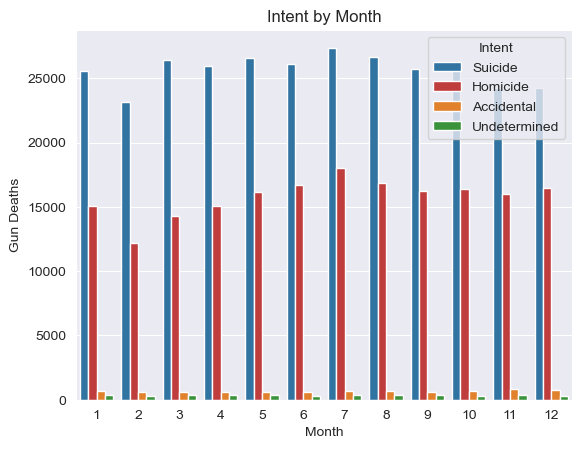

<Figure size 2000x2000 with 0 Axes>

In [68]:
# Set the style to darkgrid
sns.set_style("darkgrid")

# Define darker colors for the plot
colors = ["#1f77b4", "#d62728", "#ff7f0e", "#2ca02c"]

# Create a count plot for gun deaths by month and intent with darker colors
ax = sns.countplot(x="Month", hue="Intent", data=df_new, palette=colors)

# Set the title of the plot
ax.set_title('Intent by Month')

# Customize the plot
plt.xlabel("Month")  # Set x-axis label to 'Month'
plt.ylabel("Gun Deaths")  # Set y-axis label to 'Number of Gun Deaths'
plt.legend(title="Intent")  # Add legend with title 'Intent'
plt.figure(figsize=(20, 20))  # Set the size of the figure

# Display the plot
plt.show()




###### Mean age by intent

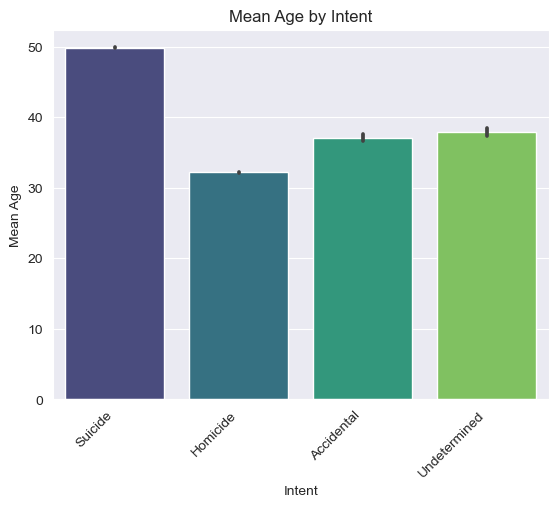

In [69]:
# Create a bar plot for the mean age of gun deaths by intent
ax = sns.barplot(x="Intent", y="Age", data=df_new, estimator='mean', palette='viridis')

# Set the title of the plot
ax.set_title('Mean Age by Intent')

# Customize the plot
ax.set_xlabel('Intent')  # Set x-axis label to 'Intent'
ax.set_ylabel('Mean Age')  # Set y-axis label to 'Mean Age'
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Display the plot
plt.show()


###### Intent by education level

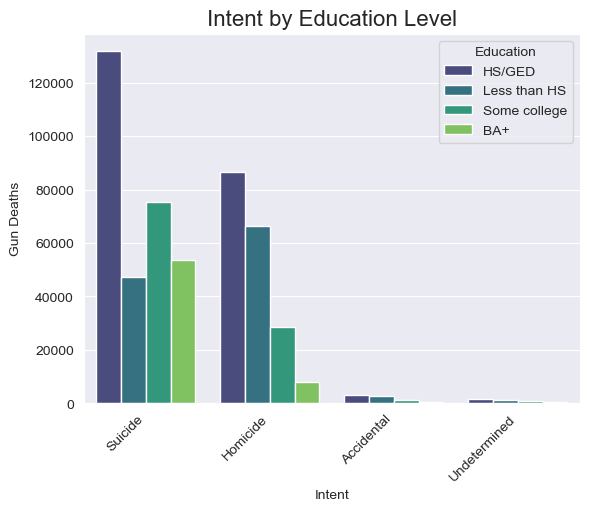

<Figure size 1200x800 with 0 Axes>

In [70]:
# Create a count plot for gun deaths by intent and education level
ax = sns.countplot(x="Intent", hue="Education", data=df_new, palette="viridis")

# Set the title of the plot
ax.set_title('Intent by Education Level', fontsize=16)

# Customize the plot
ax.set_xlabel('Intent')  # Set x-axis label to 'Intent'
ax.set_ylabel('Gun Deaths')  # Set y-axis label to 'Number of Gun Deaths'
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.figure(figsize=(12, 8))  # Set the size of the figure

# Display the plot
plt.show()



###### An overall view of every column

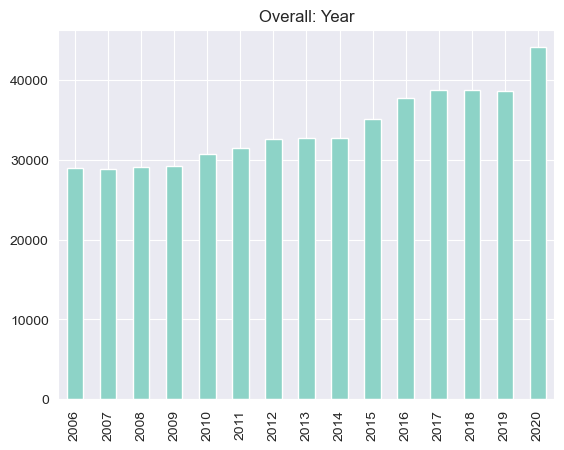

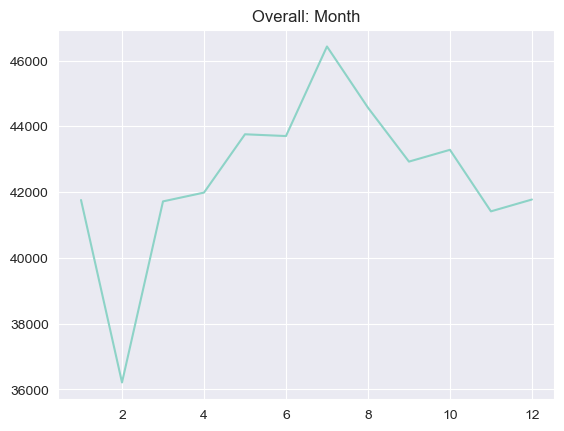

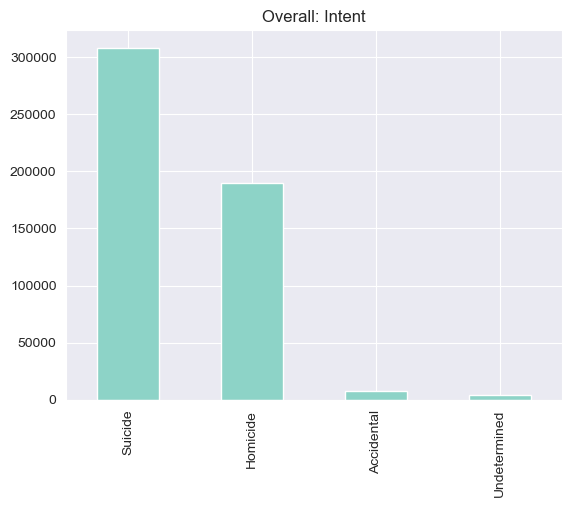

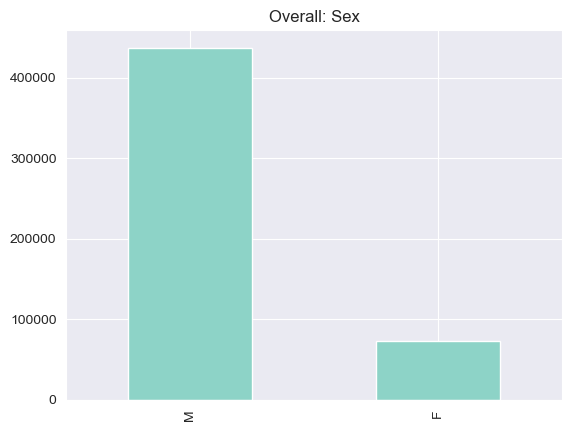

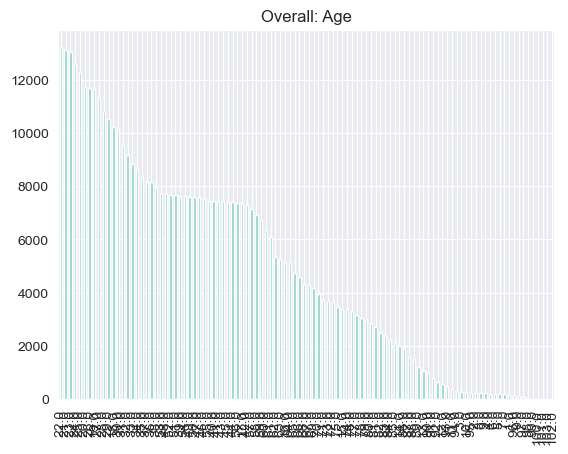

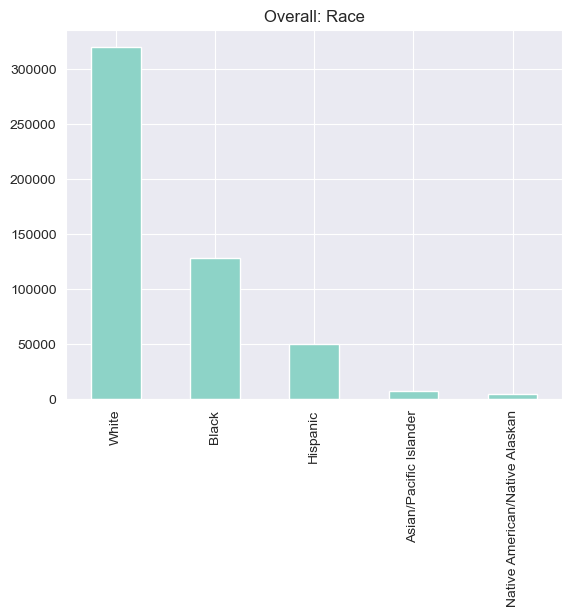

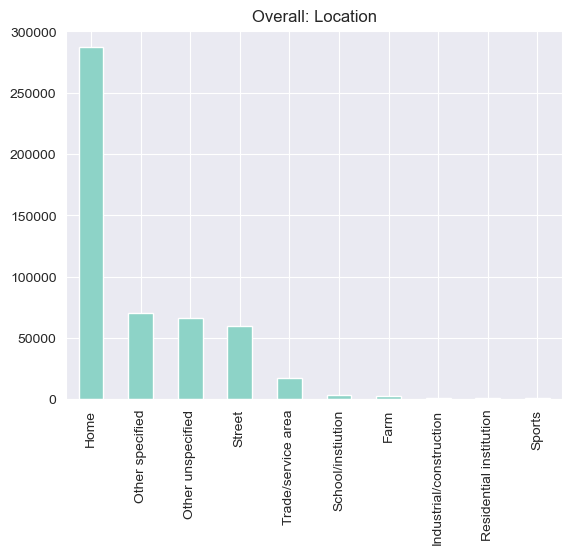

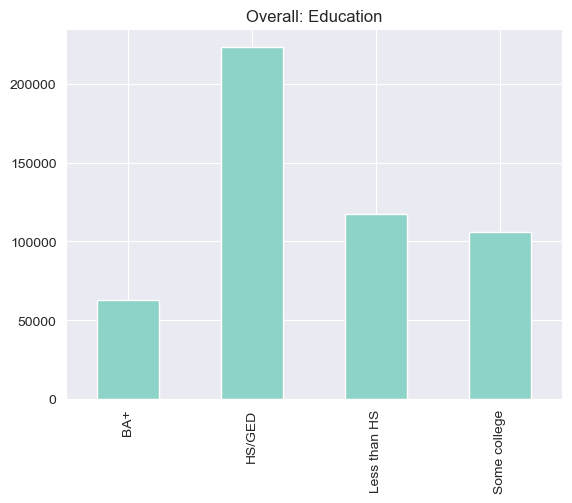

In [71]:
# Corresponding titles for different analyses
data_sources = [df_new]
titles = ['Overall', 'Suicide', 'Homicide']

# Columns of interest for analysis
interested_columns = ['Year', 'Month', 'Intent', 'Sex', 'Age', 'Race', 'Location', 'Education']

# Loop through each data source and title
for i, d in enumerate(data_sources):
    # Loop through each column of interest
    for col in interested_columns:
        # Check the type of plot based on the column
        if col.lower() == 'year' or col.lower() == 'education':
            # For 'Year' and 'Education,' create a bar plot
            d[col].value_counts().sort_index().plot(kind='bar')
        elif col.lower() == 'month':
            # For 'Month,' create a line plot to show trends
            d[col].value_counts().sort_index().plot(kind='line')
        else:
            # For other columns, create a bar plot
            d[col].value_counts().plot(kind='bar')

        # Set the title of the plot based on the current title and column
        plt.title(titles[i] + ': ' + col)

        # Show the plot
        plt.show()



###### Pair plots of gun deaths by intent (Suicide vs Homicide)

<Figure size 800x600 with 0 Axes>

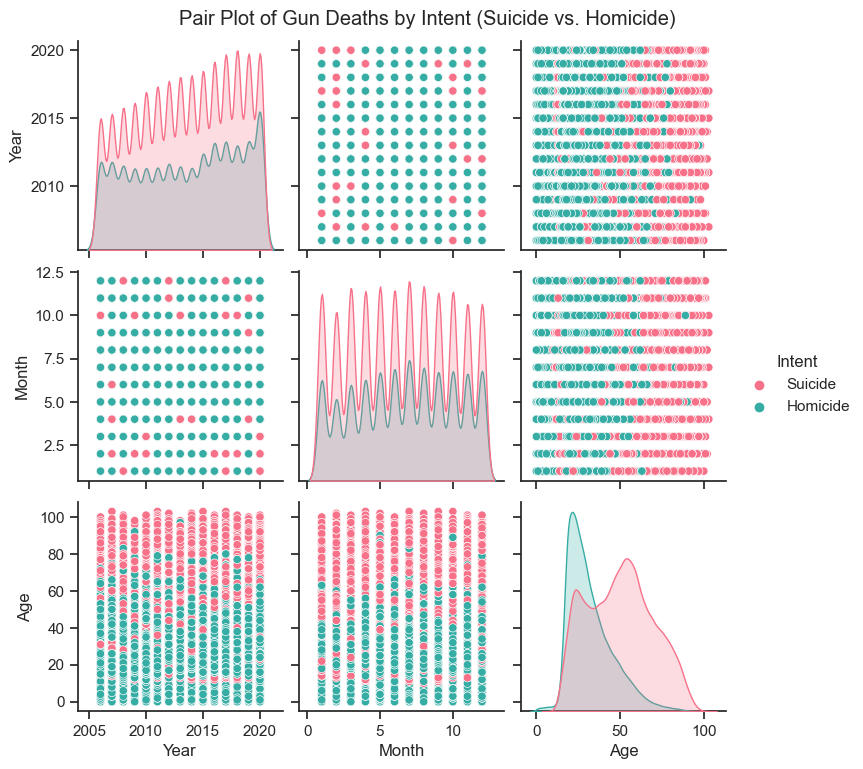

In [72]:
# Set the figure size for the pair plot
plt.figure(figsize=(8, 6))

# Set the style to ticks
sns.set(style="ticks")

# Create a pair plot for the 'Intent' column, including only 'Suicide' and 'Homicide' rows
sns.pairplot(df_new[df_new['Intent'].isin(['Suicide', 'Homicide'])], hue="Intent", palette="husl")

# Set the title for the pair plot
plt.suptitle('Pair Plot of Gun Deaths by Intent (Suicide vs. Homicide)', y=1.02)

# Display the pair plot
plt.show()


###### Heatmap of gun deaths by year

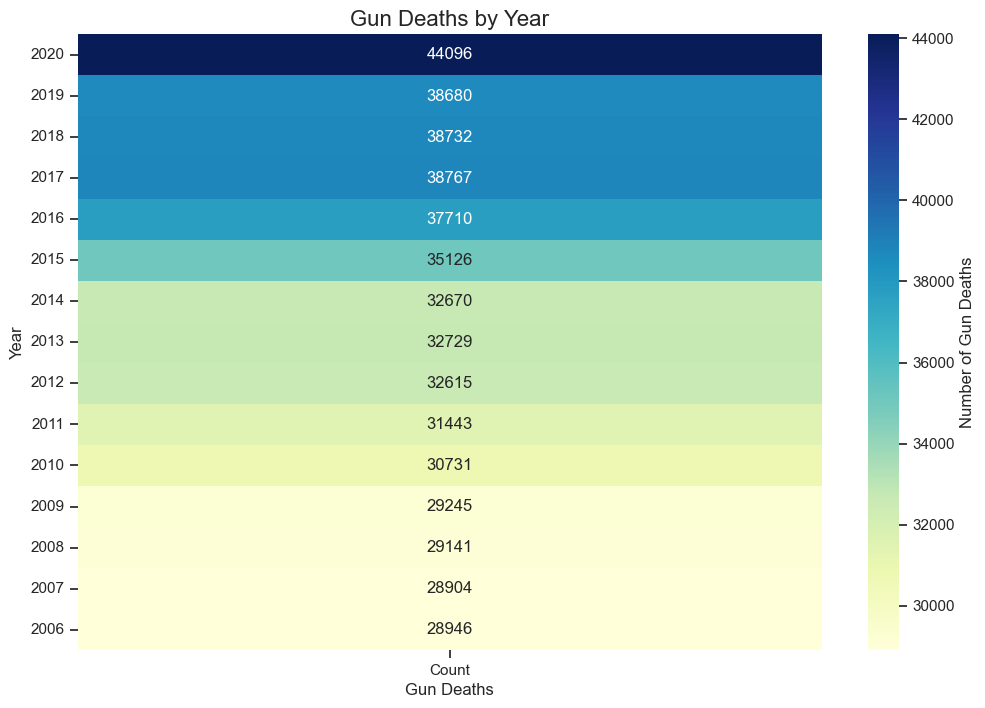

In [73]:
# Create a pivot table for heatmap, grouping by 'Year' and counting the occurrences
heatmap_data = df_new.groupby('Year').size().reset_index(name='Count').set_index('Year')

# Sort the DataFrame in descending order based on the 'Year' column
heatmap_data = heatmap_data.sort_values(by='Year', ascending=False)

# Create a heatmap with specified color map, annotations, and color bar label
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g', cbar_kws={'label': 'Number of Gun Deaths'})

# Set the title, x-axis label, and y-axis label
plt.title('Gun Deaths by Year', fontsize=16)
plt.xlabel('Gun Deaths')
plt.ylabel('Year')

# Rotate the y-axis labels to be perpendicular for better readability
plt.yticks(rotation=0)

# Display the heatmap
plt.show()


###### Monthly gun deaths 

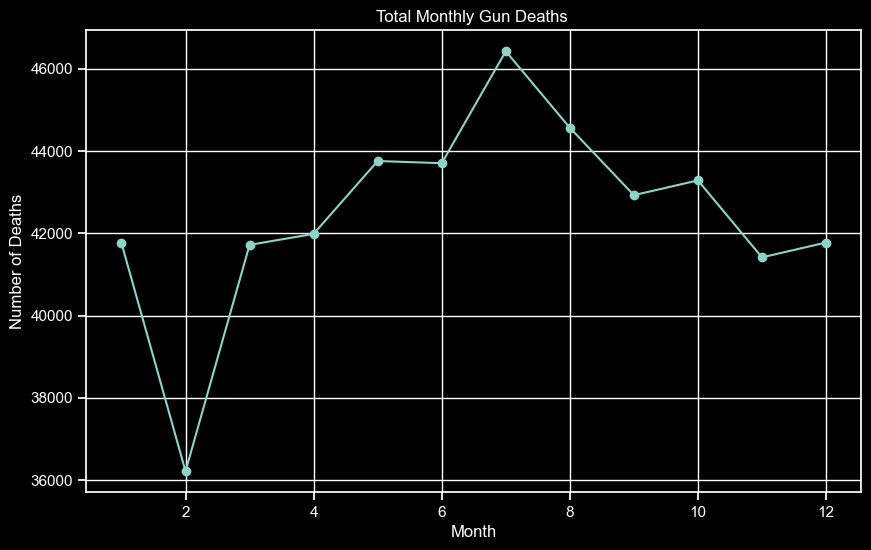

In [86]:
# Group the data by month and calculate the total number of deaths for each month
monthly_deaths = df_new.groupby('Month')['Year'].count()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_deaths.index, monthly_deaths.values, marker='o', linestyle='-')

# Adding labels and title
plt.title('Total Monthly Gun Deaths ')
plt.xlabel('Month')
plt.ylabel('Number of Deaths')


# plt.xticks(monthly_deaths.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.grid(True)
plt.show()



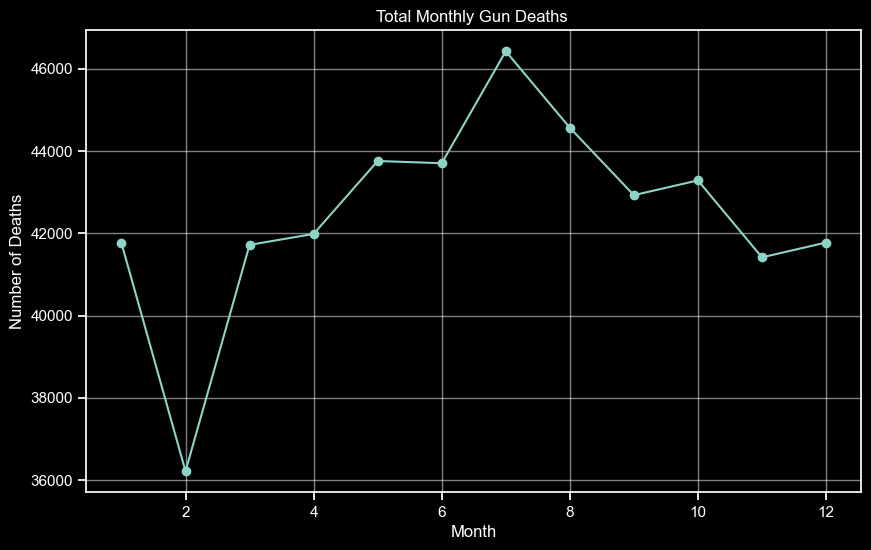

In [87]:
# Group the data by month and calculate the total number of deaths for each month
monthly_deaths = df_new.groupby('Month')['Year'].count()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_deaths.index, monthly_deaths.values, marker='o', linestyle='-')

# Adding labels and title
plt.title('Total Monthly Gun Deaths ')
plt.xlabel('Month')
plt.ylabel('Number of Deaths')

# Making the grid more transparent
plt.grid(True, alpha=0.5)

# Uncomment the line below if you want to customize the x-axis labels
# plt.xticks(monthly_deaths.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()


###### Yearly homicide deaths

<module 'matplotlib.pyplot' from 'C:\\Users\\pitbo\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

<Figure size 1200x600 with 0 Axes>

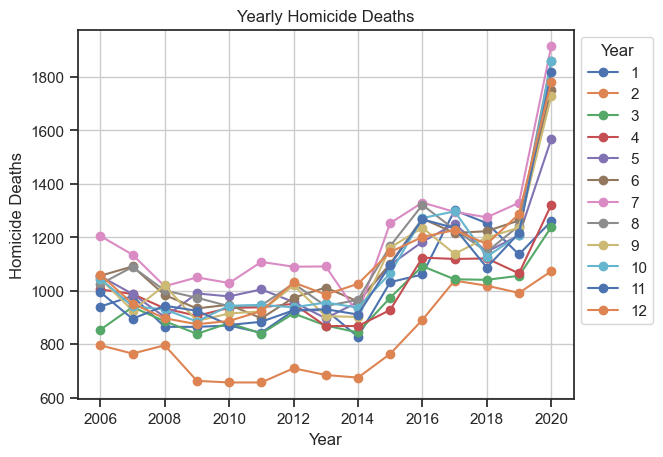

In [75]:
# Filter the data for suicide deaths
homicide_deaths_df = df_new[df_new['Intent'] == 'Homicide']

# Group the filtered data by year and month and calculate the total number of suicide deaths for each month
yearly_homicide_deaths = homicide_deaths_df.groupby(['Year', 'Month']).size().unstack()

# Plotting
plt.figure(figsize=(12, 6))
yearly_homicide_deaths.plot(marker='o', linestyle='-')

# Adding labels and title
plt.title('Yearly Homicide Deaths')
plt.xlabel('Year')
plt.ylabel('Homicide Deaths')
plt.legend(title='Year', bbox_to_anchor=(1, 1))


# plt.xticks(yearly_homicide_deaths.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.grid(True)
plt

###### Suicide rate of entire dataset

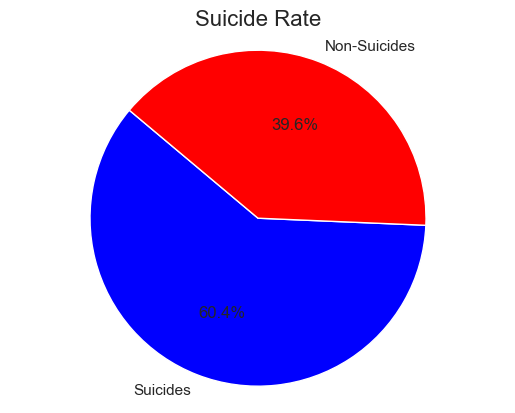

<Figure size 640x480 with 0 Axes>

In [79]:
# Filter the DataFrame to extract rows where the 'Intent' column is labeled as 'Suicide'
suicides = df_new[df_new['Intent'] == 'Suicide']

# Filter the DataFrame to extract rows where the 'Intent' column is not labeled as 'Suicide'
non_suicides = df_new[df_new['Intent'] != 'Suicide']


# Calculate the suicide rate
suicide_rate = len(suicides) / len(df_new) * 100

# Create a pie chart
labels = ['Suicides', 'Non-Suicides']
sizes = [len(suicides), len(non_suicides)]
colors = ['blue', 'red']  # Adjusted colors to red and blue



plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.title('Suicide Rate', fontsize=16)
plt.show()
plt.savefig('suicide_rate.png')

###### Treemap of suicides by education level

In [77]:
# Filter the DataFrame to include only suicides
suicides = df_new[df_new['Intent'] == 'Suicide']

# Count the number of suicides for each education level
education_counts = suicides['Education'].value_counts().reset_index()
education_counts.columns = ['Education Level', 'Suicides']

# Create a treemap
fig = px.treemap(education_counts, path=['Education Level'], values='Suicides',
                 title='Distribution of Suicides by Education Level',
                 color='Suicides', color_continuous_scale='viridis')

# Show the treemap
fig.show()


### Conclusion

#### As I looked into the data, I was struck by how a big proportion, more than 60%, of the gun deaths in the dataset were from people taking their own lives. That was way more than I expected and very eye opening. On the other hand, I thought there'd be a lot more cases where the police were involved in gun deaths, but there were only 161 instances in the dataset.

#### One thing that wasn't surprising in the data was that males were significantly more involved in gun deaths compared to females. This aligns with a common understanding that gun-related incidents often disproportionately affect males.

#### When I checked the education levels, it turns out that high school graduates had the highest rate of gun deaths. Also, while looking at race, "white" came out on top in all categories, whether it was homicides, suicides, or accidental deaths, and by a large margin. That was a bit unexpected.



#### For ages, it made sense that the 21-30 age group had the most gun deaths due to homicides. But what stood out the most was that the 51-60 age group had the highest rate for suicides.  

#### The biggest challenge I faced was combining the initial 15 datasets into one. 

#### In summary, the initial exploration of the dataset revealed surprising trends, challenging preconceptions about the distribution of gun deaths across various categories. These findings underscore the complexity and multifaceted nature of gun violence, urging a more nuanced understanding of the factors contributing to different types of incidents. The prevalence of suicide as a significant contributor to gun deaths in the dataset highlights the critical importance of addressing mental health concerns and implementing targeted prevention strategies to mitigate the impact of self-inflicted firearm incidents.

In [80]:
df_new

Year  Month    Intent Police Sex   Age      Race            Location  \
0       2006      1   Suicide     No   M  81.0     White                Home   
1       2006      1  Homicide     No   M  55.0     White   Other unspecified   
2       2006      1  Homicide     No   M  19.0     Black                Home   
3       2006      1  Homicide     No   M  33.0     Black   Other unspecified   
4       2006      1  Homicide     No   M  23.0     Black                Home   
...      ...    ...       ...    ...  ..   ...       ...                 ...   
529227  2020     12  Homicide     No   M  35.0     Black                Home   
529228  2020     12   Suicide     No   M  35.0  Hispanic                Home   
529229  2020     12  Homicide     No   M  34.0     Black              Street   
529230  2020     12  Homicide     No   M  26.0     Black              Street   
529231  2020     12  Homicide     No   M  24.0     Black  Trade/service area   

           Education  
0             HS/GED  
1       Less than HS  
2       Less than HS  
3       Less than HS  
4       Less than HS  
...              ...  
529227        HS/GED  
529228  Some college  
529229        HS/GED  
529230        HS/GED  
529231        HS/GED  

[509535 rows x 9 columns]

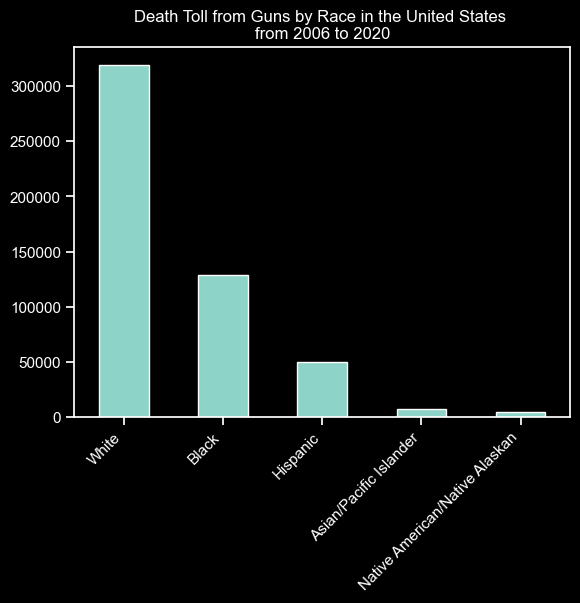

In [85]:


# Counting the number of gun deaths by race in descending order
race_counts = df_new['Race'].value_counts(ascending=False)

# Creating a bar plot for the death toll by race
ax = race_counts.plot.bar()

# Adding title to the plot
plt.title('Death Toll from Guns by Race in the United States \nfrom 2006 to 2020')

# Rotate x-axis labels diagonally
plt.xticks(rotation=45, ha='right')  # ha='right' ensures that the labels are right-justified

# Displaying the plot
plt.show()
